### <center>Análise Exploratória dos Dados EDA</center>

-----------------------------------------------------------------------------
Este notebook realiza uma análise exploratória do conjunto de dados de super-heróis.
Ele inclui:
- Leitura e exibição de dados.
- Identificação e tratamento de valores ausentes.
- Visualizações das distribuições e correlações.
- Salvamento dos dados processados para os próximos notebooks.

#### **Análise Exploratória dos Dados**


In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

# Configurações do notebook
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

#### **Exploração e Limpeza dos Dados**

In [92]:
# 1. Carregamento dos dados
super_hero_powers = pd.read_csv('../data/raw/super_hero_powers.csv')
heroes_information = pd.read_csv('../data/raw/heroes_information.csv')

display(super_hero_powers)
display(heroes_information)

# 2. Identificação e tratamento de valores inválidos
# Substituir valores -99 e negativos por NaN
heroes_information['Height'] = heroes_information['Height'].apply(lambda x: np.nan if x < 0 else x)
heroes_information['Weight'] = heroes_information['Weight'].apply(lambda x: np.nan if x < 0 else x)

# Preencher valores ausentes com a mediana
heroes_information['Height'] = heroes_information['Height'].fillna(heroes_information['Height'].median())
heroes_information['Weight'] = heroes_information['Weight'].fillna(heroes_information['Weight'].median())

# Substituir valores ausentes em Publisher por 'Unknown'
heroes_information['Publisher'] = heroes_information['Publisher'].fillna('Unknown')

"""
# 3. Remoção de outliers
# Cálculo dos limites interquartílicos (IQR)
q1_height = heroes_information['Height'].quantile(0.25)
q3_height = heroes_information['Height'].quantile(0.75)
iqr_height = q3_height - q1_height
height_lower_bound = q1_height - 1.5 * iqr_height
height_upper_bound = q3_height + 1.5 * iqr_height

q1_weight = heroes_information['Weight'].quantile(0.25)
q3_weight = heroes_information['Weight'].quantile(0.75)
iqr_weight = q3_weight - q1_weight
weight_lower_bound = q1_weight - 1.5 * iqr_weight
weight_upper_bound = q3_weight + 1.5 * iqr_weight

# Filtrar dados sem outliers
heroes_information = heroes_information[
    (heroes_information['Height'] >= height_lower_bound) &
    (heroes_information['Height'] <= height_upper_bound) &
    (heroes_information['Weight'] >= weight_lower_bound) &
    (heroes_information['Weight'] <= weight_upper_bound)
]
"""
# 4. Unificação das bases
# Verificar nomes em comum entre os datasets
common_names = set(super_hero_powers['hero_names']).intersection(set(heroes_information['name']))

# Filtrar datasets pelos nomes comuns
super_hero_powers_filtered = super_hero_powers[super_hero_powers['hero_names'].isin(common_names)]
heroes_information_filtered = heroes_information[heroes_information['name'].isin(common_names)]

# Resetar índices
super_hero_powers_filtered.reset_index(drop=True, inplace=True)
heroes_information_filtered.reset_index(drop=True, inplace=True)

# Unificar datasets
merged_data = pd.merge(
    super_hero_powers_filtered,
    heroes_information_filtered,
    left_on='hero_names',
    right_on='name'
)

# Remover colunas desnecessárias para o treinamento
merged_data.drop(columns=['hero_names', 'name', 'Unnamed: 0'], inplace=True, errors='ignore')

# Salvar o dataset limpo e preparado
merged_data.to_csv('../data/processed/merged_data_cleaned.csv', index=False)
print("\nBase de dados limpa e preparada salva em 'data/processed/merged_data_cleaned.csv'.")

,hero_names,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
0,3-D Man,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,A-Bomb,False,True,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,Abe Sapien,True,True,False,False,True,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,Abin Sur,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,Abomination,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
662,Yellowjacket II,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
663,Ymir,False,False,False,False,True,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
664,Yoda,True,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
665,Zatanna,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


,Unnamed: 0,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
0,0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0
1,1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0
2,2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0
3,3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,-,bad,441.0
4,4,Abraxas,Male,blue,Cosmic Entity,Black,-99.0,Marvel Comics,-,bad,-99.0
...,...,...,...,...,...,...,...,...,...,...,...
729,729,Yellowjacket II,Female,blue,Human,Strawberry Blond,165.0,Marvel Comics,-,good,52.0
730,730,Ymir,Male,white,Frost Giant,No Hair,304.8,Marvel Comics,white,good,-99.0
731,731,Yoda,Male,brown,Yoda's species,White,66.0,George Lucas,green,good,17.0
732,732,Zatanna,Female,blue,Human,Black,170.0,DC Comics,-,good,57.0



Base de dados limpa e preparada salva em 'data/processed/merged_data_cleaned.csv'.


Primeiras linhas do dataset unificado:


,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,Danger Sense,...,Omniscient,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
0,False,True,False,False,False,True,False,False,False,False,...,False,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0
1,True,True,False,False,True,True,False,False,False,False,...,False,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0
2,False,False,True,False,False,False,False,False,False,False,...,False,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0
3,False,True,False,False,False,False,False,False,False,False,...,False,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,-,bad,441.0
4,False,False,False,True,False,False,False,False,True,False,...,False,Male,blue,Cosmic Entity,Black,183.0,Marvel Comics,-,bad,81.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
655,False,False,False,False,False,False,False,False,True,False,...,False,Female,blue,Human,Strawberry Blond,165.0,Marvel Comics,-,good,52.0
656,False,False,False,False,True,True,False,False,False,False,...,False,Male,white,Frost Giant,No Hair,304.8,Marvel Comics,white,good,81.0
657,True,False,False,False,False,False,True,False,False,True,...,False,Male,brown,Yoda's species,White,66.0,George Lucas,green,good,17.0
658,False,False,False,False,False,False,False,False,False,False,...,False,Female,blue,Human,Black,170.0,DC Comics,-,good,57.0



Estatísticas descritivas do dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Columns: 176 entries, Agility to Weight
dtypes: bool(167), float64(2), object(7)
memory usage: 154.2+ KB


None


Valores ausentes por coluna:


Agility                  0
Accelerated Healing      0
Lantern Power Ring       0
Dimensional Awareness    0
Cold Resistance          0
                        ..
Height                   0
Publisher                0
Skin color               0
Alignment                0
Weight                   0
Length: 176, dtype: int64

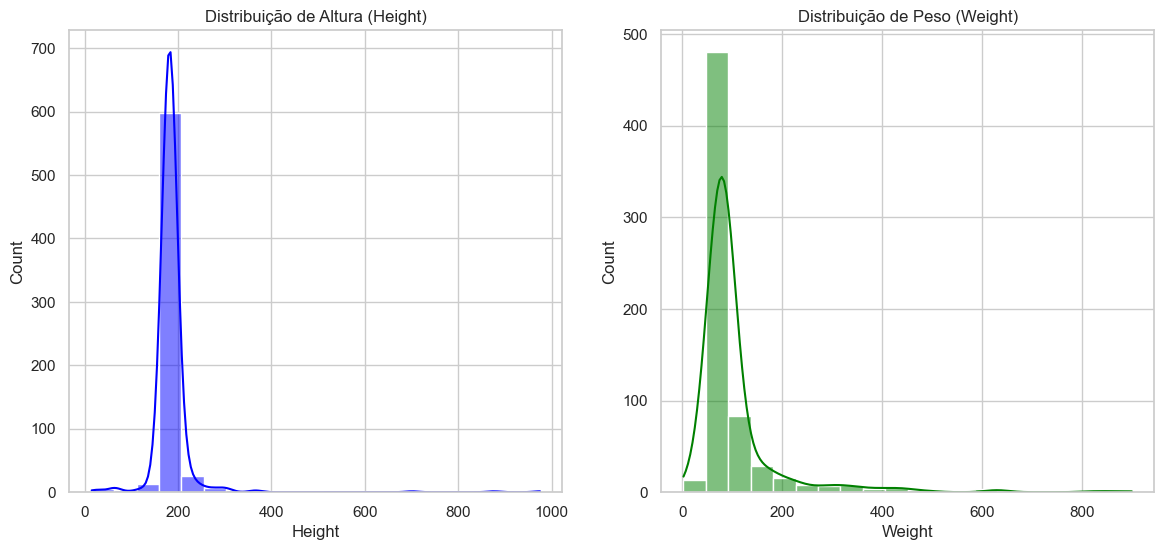

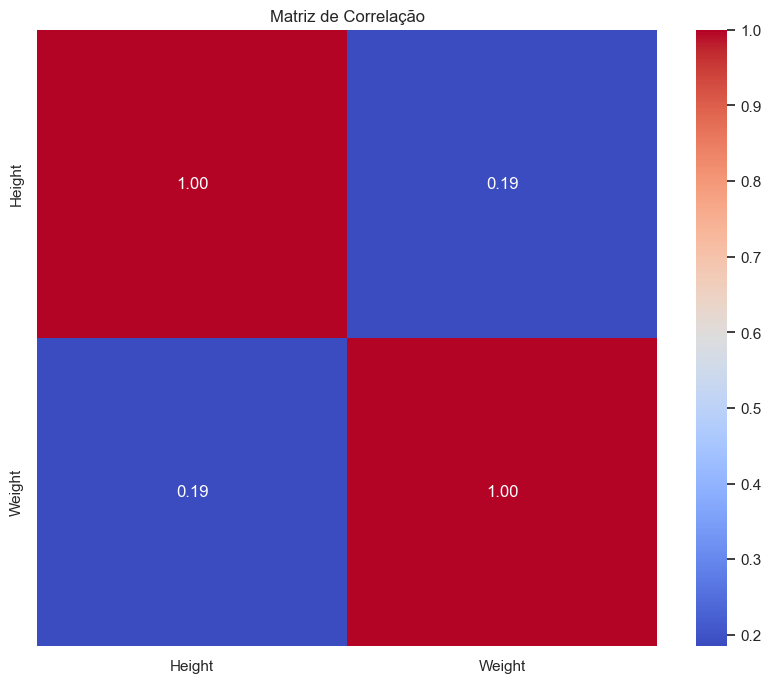

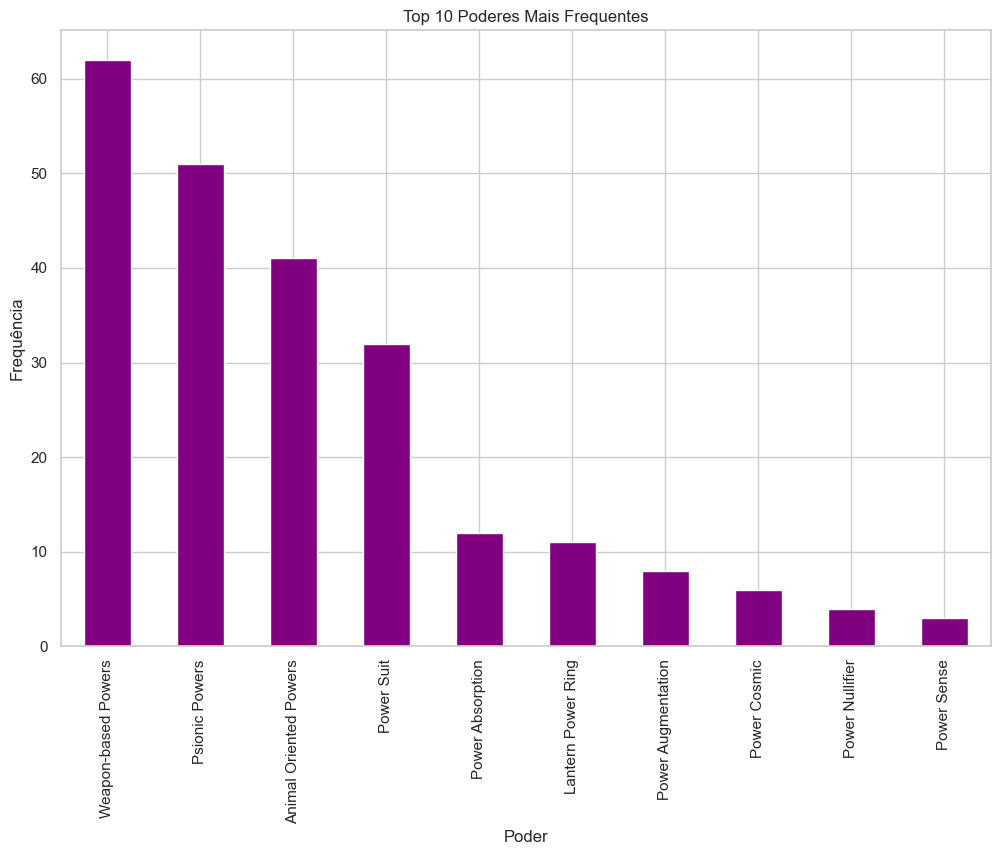

In [93]:
# Carregar o dataset processado
merged_data = pd.read_csv('../data/processed/merged_data_cleaned.csv')

# Exibir as primeiras linhas do dataset
print("Primeiras linhas do dataset unificado:")
display(merged_data)

# 1. Estatísticas descritivas
print("\nEstatísticas descritivas do dataset:")
display(merged_data.info())

# 2. Verificação de valores ausentes
print("\nValores ausentes por coluna:")
display(merged_data.isnull().sum())

# 3. Distribuições gerais
# Distribuição de Height e Weight
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.histplot(merged_data['Height'], kde=True, bins=20, color='blue')
plt.title('Distribuição de Altura (Height)')

plt.subplot(1, 2, 2)
sns.histplot(merged_data['Weight'], kde=True, bins=20, color='green')
plt.title('Distribuição de Peso (Weight)')

plt.show()

# 4. Análise de correlação
# Selecionar colunas numéricas para análise de correlação
numerical_features = merged_data.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = merged_data[numerical_features].corr()

# Visualizar a matriz de correlação
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Matriz de Correlação')
plt.show()

# 5. Análise de poderes mais comuns
# Selecionar apenas colunas de poderes (booleanas)
power_columns = merged_data.columns[merged_data.columns.str.contains('Power')]
power_counts = merged_data[power_columns].sum().sort_values(ascending=False)

# Gráfico dos 10 poderes mais comuns
plt.figure(figsize=(12, 8))
power_counts.head(10).plot(kind='bar', color='purple')
plt.title('Top 10 Poderes Mais Frequentes')
plt.xlabel('Poder')
plt.ylabel('Frequência')
plt.show()
